# Jaffle Shop Data Analysis - Final Project

## Instructions
You have been hired as a data analyst for Jaffle Shop, a growing chain of gourmet toasted sandwich restaurants. The executive team needs insights to make strategic business decisions.

Using the provided datasets and Python Polars, analyze the business performance and provide data-driven recommendations. You must use Polars for all data manipulation and analysis.

## Available Data
- `Customers.csv`: Customer information
- `Orders.csv`: Order transactions with totals and timestamps
- `Items.csv`: Individual items within each order
- `Products.csv`: Product catalog with prices and descriptions
- `Stores.csv`: Store locations and opening dates
- `Supplies.csv`: Supply costs for each product

**Time Limit: 90 minutes**

## Setup and Data Loading

In [2]:
# Import necessary libraries
import polars as pl
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np

# Set up plotting style
plt.style.use('seaborn-v0_8-darkgrid')

In [3]:
# Load all datasets
customers = pl.read_csv('https://raw.githubusercontent.com/Masters-in-Management-2023-2024/final-project-jaffle-shop-blue-1/refs/heads/main/data/Customers.csv')
orders = pl.read_csv('https://raw.githubusercontent.com/Masters-in-Management-2023-2024/final-project-jaffle-shop-blue-1/refs/heads/main/data/Orders.csv')
items = pl.read_csv('https://raw.githubusercontent.com/Masters-in-Management-2023-2024/final-project-jaffle-shop-blue-1/refs/heads/main/data/Items.csv')
products = pl.read_csv('https://raw.githubusercontent.com/Masters-in-Management-2023-2024/final-project-jaffle-shop-blue-1/refs/heads/main/data/Products.csv')
stores = pl.read_csv('https://raw.githubusercontent.com/Masters-in-Management-2023-2024/final-project-jaffle-shop-blue-1/refs/heads/main/data/Stores.csv')
supplies = pl.read_csv('https://raw.githubusercontent.com/Masters-in-Management-2023-2024/final-project-jaffle-shop-blue-1/refs/heads/main/data/Supplies.csv')


# Display basic information about each dataset
print("Dataset shapes:")
print(f"Customers: {customers.shape}")
print(f"Orders: {orders.shape}")
print(f"Items: {items.shape}")
print(f"Products: {products.shape}")
print(f"Stores: {stores.shape}")
print(f"Supplies: {supplies.shape}")

Dataset shapes:
Customers: (932, 2)
Orders: (63148, 7)
Items: (90184, 3)
Products: (10, 5)
Stores: (6, 4)
Supplies: (65, 5)


## Question 1: Revenue Performance Analysis

The CFO wants to understand the company's financial performance across different dimensions. Analyze:
- What is the total revenue generated by Jaffle Shop? (Store result in variable: `total_revenue`)
- How does revenue vary by store location? (Store result in variable: `revenue_by_store`)
- What are the monthly revenue trends? (Store result in variable: `monthly_revenue_trends`)
- Which day of the week generates the most revenue? (Store result in variable: `revenue_by_day_of_week`)
- Include at least one chart for one of these questions

In [4]:
# Q1.1: Calculate total revenue
total_revenue = orders.select(pl.col('order_total')).sum().item()
print(f"Total Revenue: ${total_revenue:,.2f}")


Total Revenue: $66,038,193.00


In [5]:
# Q1.2: Revenue by store location
revenue_by_store = orders.join(
    stores,
    left_on='store_id',
    right_on='id'
    ).group_by('name').agg(pl.col('order_total').sum().alias('total_revenue_by_store'))
print(revenue_by_store.sort('total_revenue_by_store'))


shape: (2, 2)
┌──────────────┬────────────────────────┐
│ name         ┆ total_revenue_by_store │
│ ---          ┆ ---                    │
│ str          ┆ i64                    │
╞══════════════╪════════════════════════╡
│ Brooklyn     ┆ 22822628               │
│ Philadelphia ┆ 43215565               │
└──────────────┴────────────────────────┘


shape: (12, 2)
┌─────────┬─────────────────┐
│ month   ┆ monthly_revenue │
│ ---     ┆ ---             │
│ str     ┆ i64             │
╞═════════╪═════════════════╡
│ 2016-09 ┆ 1644922         │
│ 2016-10 ┆ 1956651         │
│ 2016-11 ┆ 2552662         │
│ 2016-12 ┆ 3307337         │
│ 2017-01 ┆ 3821291         │
│ …       ┆ …               │
│ 2017-04 ┆ 7392014         │
│ 2017-05 ┆ 8469909         │
│ 2017-06 ┆ 8617148         │
│ 2017-07 ┆ 8585320         │
│ 2017-08 ┆ 9332296         │
└─────────┴─────────────────┘


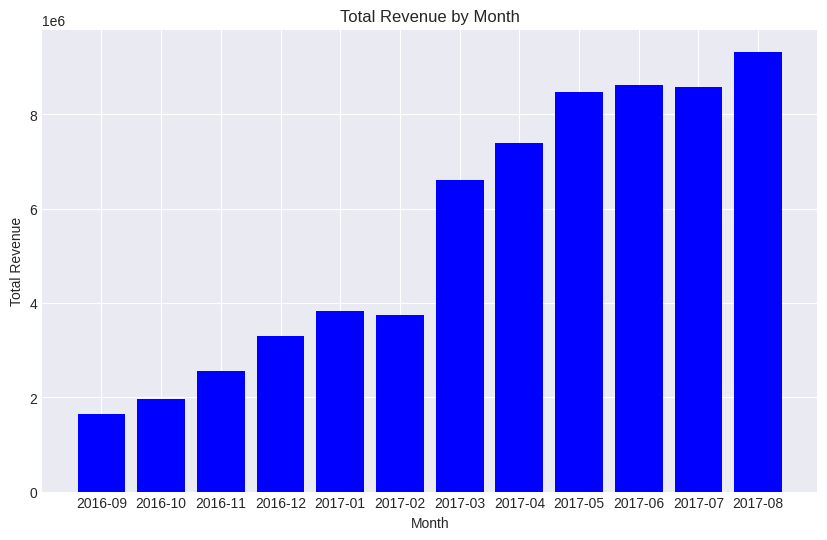

In [6]:
# Q1.3: Monthly revenue trends
order_dates = orders.with_columns(
    pl.col('ordered_at').str.strptime(pl.Datetime, '%Y-%m-%dT%H:%M:%S').cast(pl.Date)
    )
monthly_revenue = order_dates.with_columns(
    pl.col('ordered_at').dt.strftime("%Y-%m").alias('month')
).group_by('month').agg(pl.col('order_total').sum().alias('monthly_revenue')).sort('month')
print(monthly_revenue)


#Plott for monthly sales
months = monthly_revenue['month'].to_list()
monthly_revenues = monthly_revenue['monthly_revenue'].to_list()

plt.figure(figsize=(10, 6))
plt.bar(months, monthly_revenues, color='blue')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Month')

plt.show()



revenue by days shape: (7, 3)
┌─────────────┬─────────┬──────────────────────┐
│ weekday_num ┆ weekday ┆ total_revenue_by_day │
│ ---         ┆ ---     ┆ ---                  │
│ i8          ┆ str     ┆ i64                  │
╞═════════════╪═════════╪══════════════════════╡
│ 1           ┆ Mon     ┆ 10611971             │
│ 2           ┆ Tue     ┆ 10814455             │
│ 3           ┆ Wed     ┆ 10834569             │
│ 4           ┆ Thu     ┆ 10829195             │
│ 5           ┆ Fri     ┆ 10758715             │
│ 6           ┆ Sat     ┆ 5981489              │
│ 7           ┆ Sun     ┆ 6207799              │
└─────────────┴─────────┴──────────────────────┘
highest revenue on : shape: (1, 3)
┌─────────────┬─────────┬──────────────────────┐
│ weekday_num ┆ weekday ┆ total_revenue_by_day │
│ ---         ┆ ---     ┆ ---                  │
│ i8          ┆ str     ┆ i64                  │
╞═════════════╪═════════╪══════════════════════╡
│ 3           ┆ Wed     ┆ 10834569             │
└───

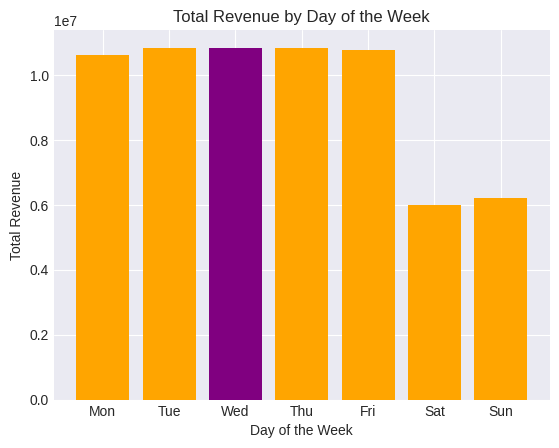

In [7]:
# Q1.4: Revenue by day of week
days_of_week = order_dates.with_columns(
    pl.col('ordered_at').dt.weekday().alias("weekday_num"),
    pl.col('ordered_at').dt.strftime('%a').alias("weekday")
)
revenue_by_day_of_week = days_of_week.group_by(
    'weekday_num', 'weekday'
    ).agg(
        pl.col('order_total').sum().alias('total_revenue_by_day')
        ).sort('weekday_num')

print("revenue by days", revenue_by_day_of_week)

print(f"highest revenue on : {revenue_by_day_of_week.sort('total_revenue_by_day', descending=True).head(1)}")

#plotting
weekdays = revenue_by_day_of_week['weekday'].to_list()
revenues = revenue_by_day_of_week['total_revenue_by_day'].to_list()

highest_revenue_day = revenues.index(max(revenues))

colors = ["orange"] * len(revenues)
colors[highest_revenue_day] = "purple"

plt.bar(weekdays, revenues, color = colors)
plt.xlabel('Day of the Week')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Day of the Week')

plt.show()


## Question 2: Product Performance

The Product Manager needs insights about the menu items:
- What is the revenue contribution of each product category (jaffles vs beverages)? (Store result in variable: `revenue_by_category`)
- What is the average price of products by type (jaffles vs beverages)?
- Include at least one chart to answer one of the above questions.

In [8]:
# Q2.1: Revenue by product category
#q2.1
category_map = {
    "JAF-001": "jaffle",
    "JAF-002": "jaffle",
    "JAF-003": "jaffle",
    "JAF-004": "jaffle",
    "JAF-005": "jaffle",
    "BEV-001": "beverage",
    "BEV-002": "beverage",
    "BEV-003": "beverage",
    "BEV-004": "beverage",
    "BEV-005": "beverage"
}

category_df = pl.DataFrame({
    'sku': list(category_map.keys()),
    'category': list(category_map.values())
})

items_with_price = items.join(products, on='sku', how='left')

items_with_category_and_price = items_with_price.join(category_df, on='sku', how='left')

items_with_revenue = items_with_category_and_price.join(orders, left_on='order_id', right_on='id', how='left')

revenue_by_category = items_with_revenue.group_by('category').agg(
    pl.sum('price').alias('total_revenue')
)

print("Revenue Contribution by Category:", revenue_by_category)


Revenue Contribution by Category: shape: (2, 2)
┌──────────┬───────────────┐
│ category ┆ total_revenue │
│ ---      ┆ ---           │
│ str      ┆ i64           │
╞══════════╪═══════════════╡
│ beverage ┆ 39836200      │
│ jaffle   ┆ 22880900      │
└──────────┴───────────────┘


In [9]:
# Q2.2 Average price of products by type
average_price_by_category = items_with_category_and_price.group_by('category').agg(
    pl.mean('price').alias('average_product_price')
)

print("Average Product Price by Category:", average_price_by_category)

Average Product Price by Category: shape: (2, 2)
┌──────────┬───────────────────────┐
│ category ┆ average_product_price │
│ ---      ┆ ---                   │
│ str      ┆ f64                   │
╞══════════╪═══════════════════════╡
│ beverage ┆ 560.260467            │
│ jaffle   ┆ 1199.145747           │
└──────────┴───────────────────────┘


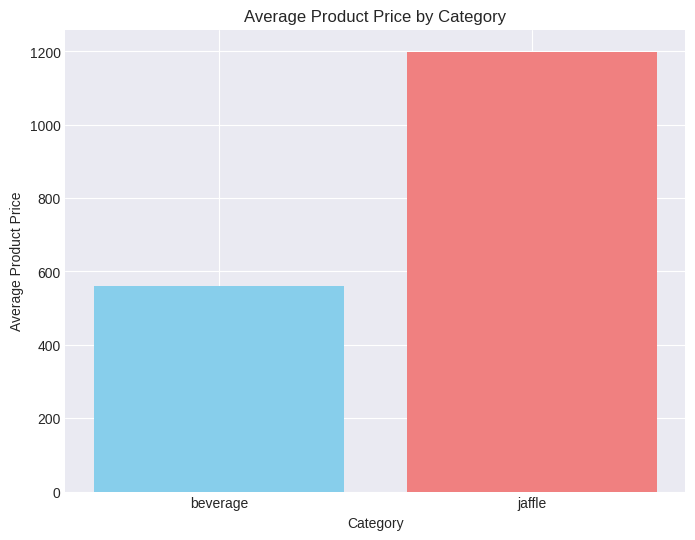

In [10]:
#plot for above question
categories = average_price_by_category['category'].to_list()
average_prices = average_price_by_category['average_product_price'].to_list()

plt.figure(figsize=(8, 6))
plt.bar(categories, average_prices, color=['skyblue', 'lightcoral'])
plt.xlabel('Category')
plt.ylabel('Average Product Price')
plt.title('Average Product Price by Category')
plt.show()

## Question 3: Store Expansion Strategy

The Operations Director is planning expansion strategies:
- Which stores have the highest revenue per day since opening? (Store result in variable: `revenue_per_day_by_store`)
- What is the relationship between local tax rates and store performance? (Store result in variable: `tax_rate_performance`)
- Include at least one chart to answer one of the above questions.

In [11]:
# Q3.1: Revenue per day since opening by store
stores_opened = stores.with_columns(pl.col('opened_at').str.strptime(pl.Datetime, '%Y-%m-%dT%H:%M:%S'))

orders_with_store_info = orders.join(
    stores_opened,
    left_on='store_id',
    right_on='id',
    how='left'
    ).with_columns(
        pl.col('ordered_at').str.strptime(pl.Datetime, '%Y-%m-%dT%H:%M:%S'))

orders_with_days_open = orders_with_store_info.with_columns(
    (pl.col('ordered_at') - pl.col('opened_at')).dt.total_days().alias('days_open')
)

store_revenue_and_days = orders_with_days_open.group_by('store_id', 'name').agg(
    pl.sum('order_total').alias('total_revenue'),
    pl.mean('days_open').alias('average_days_open')
)

revenue_per_day_by_store = store_revenue_and_days.with_columns(
    (pl.col('total_revenue') / pl.col('average_days_open')).alias('revenue_per_day')
)

revenue_per_day_by_store = revenue_per_day_by_store.sort('revenue_per_day', descending=True)

print("Stores with Highest Revenue Per Day Since Opening:", revenue_per_day_by_store)


Stores with Highest Revenue Per Day Since Opening: shape: (2, 5)
┌─────────────────────────────┬──────────────┬───────────────┬───────────────────┬─────────────────┐
│ store_id                    ┆ name         ┆ total_revenue ┆ average_days_open ┆ revenue_per_day │
│ ---                         ┆ ---          ┆ ---           ┆ ---               ┆ ---             │
│ str                         ┆ str          ┆ i64           ┆ f64               ┆ f64             │
╞═════════════════════════════╪══════════════╪═══════════════╪═══════════════════╪═════════════════╡
│ a2a24e87-dec8-4f5d-9c9e-0e9 ┆ Brooklyn     ┆ 22822628      ┆ 95.640795         ┆ 238628.589523   │
│ 849…                        ┆              ┆               ┆                   ┆                 │
│ a9128331-08d7-41a2-b615-212 ┆ Philadelphia ┆ 43215565      ┆ 208.058299        ┆ 207708.922186   │
│ 83e…                        ┆              ┆               ┆                   ┆                 │
└─────────────────────────

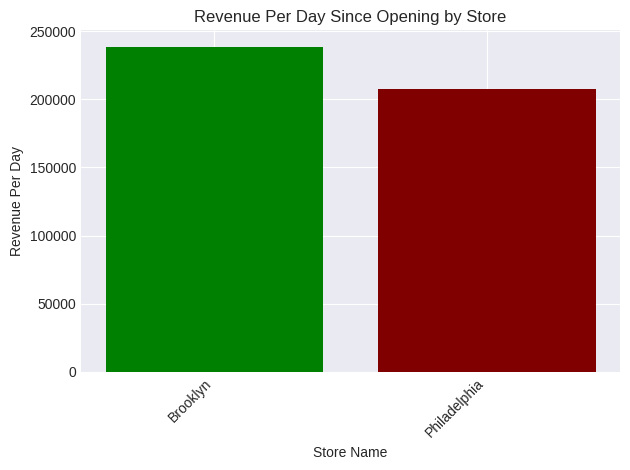

In [12]:
#plot for above question
store_names = revenue_per_day_by_store['name'].to_list()
revenue_per_day = revenue_per_day_by_store['revenue_per_day'].to_list()

plt.bar(store_names, revenue_per_day, color=['green', 'maroon'])
plt.xlabel('Store Name')
plt.ylabel('Revenue Per Day')
plt.title('Revenue Per Day Since Opening by Store')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [13]:
# Q3.2: Tax rates vs store performance
tax_rate_performance = stores.select(['id', 'name', 'tax_rate']).join(
    revenue_per_day_by_store,
    left_on='id',
    right_on='store_id',
    how='left'
)

tax_rate_performance = tax_rate_performance.filter(
    pl.col('revenue_per_day').is_not_null()
)

print(tax_rate_performance.select(['name', 'revenue_per_day', 'tax_rate']))


shape: (2, 3)
┌──────────────┬─────────────────┬──────────┐
│ name         ┆ revenue_per_day ┆ tax_rate │
│ ---          ┆ ---             ┆ ---      │
│ str          ┆ f64             ┆ f64      │
╞══════════════╪═════════════════╪══════════╡
│ Philadelphia ┆ 207708.922186   ┆ 0.06     │
│ Brooklyn     ┆ 238628.589523   ┆ 0.04     │
└──────────────┴─────────────────┴──────────┘


## Question 4: Customer Behavior Analysis

The Marketing Manager wants to understand customer patterns:
- What is the distribution of order values? (Store result in variable: `order_value_distribution`)
- How many customers are repeat customers? (Store result in variable: `repeat_customer_analysis`)
- Which customers contribute the most to revenue? (Store result in variable: `top_revenue_customers`)

Descriptive statistics for Order Total: shape: (8, 2)
┌───────────┬─────────────┐
│ statistic ┆ order_total │
│ ---       ┆ ---         │
│ str       ┆ f64         │
╞═══════════╪═════════════╡
│ count     ┆ 63148.0     │
│ mean      ┆ 1045.76856  │
│ std       ┆ 1025.930713 │
│ min       ┆ 0.0         │
│ 25%       ┆ 530.0       │
│ 50%       ┆ 636.0       │
│ 75%       ┆ 1165.0      │
│ max       ┆ 10281.0     │
└───────────┴─────────────┘


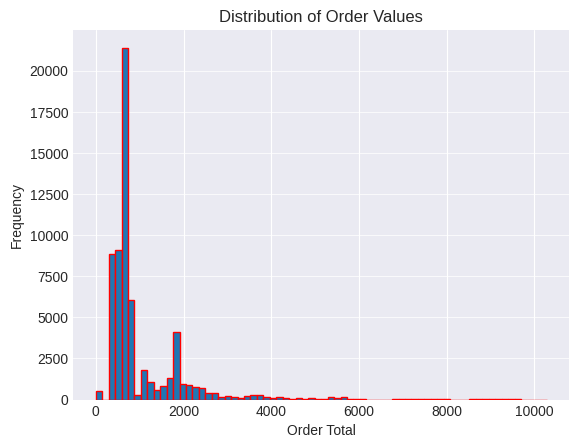

In [14]:
# Q4.1: Distribution of order values
order_value_distribution = (orders.select(
    pl.col('order_total')).describe()
    ).filter(
        pl.col('statistic') != 'null_count'
    )
print("Descriptive statistics for Order Total:", order_value_distribution)

plt.hist(orders['order_total'], bins=70, edgecolor='red')
plt.xlabel('Order Total')
plt.ylabel('Frequency')
plt.title('Distribution of Order Values')
plt.grid(axis='y', alpha=0.75)
plt.show()


In [15]:
# Q4.2: Repeat customers analysis
customer_order_counts = orders.group_by('customer').agg(
    pl.len().alias('order_count')
)

repeat_customers = customer_order_counts.join(
    customers.select(['id', 'name']),
    left_on='customer',
    right_on='id',
    how='left'
)

repeat_customer_analysis = repeat_customers.filter(
    pl.col('order_count') > 1
).sort('order_count', descending=True)

print(f"Number of repeat customers: {repeat_customer_analysis.shape[0]}")

print(f"Analysis of repeat customers: {repeat_customer_analysis.select(['name', 'order_count'])}")


Number of repeat customers: 922
Analysis of repeat customers: shape: (922, 2)
┌───────────────────┬─────────────┐
│ name              ┆ order_count │
│ ---               ┆ ---         │
│ str               ┆ u32         │
╞═══════════════════╪═════════════╡
│ Blake Matthews    ┆ 234         │
│ Connie Harrison   ┆ 231         │
│ Danny Walker      ┆ 228         │
│ Charles Adams     ┆ 226         │
│ Allison Oliver    ┆ 226         │
│ …                 ┆ …           │
│ Ashley Franco     ┆ 2           │
│ Joseph Pope       ┆ 2           │
│ Andrea Callahan   ┆ 2           │
│ Katelyn Alexander ┆ 2           │
│ Tiffany Bass      ┆ 2           │
└───────────────────┴─────────────┘


In [16]:
# Q4.3: Top revenue contributors
customer_revenue = orders.group_by('customer').agg(
    pl.sum('order_total').alias('total_customer_revenue')
)

top_revenue_customers = customer_revenue.join(
    customers.select(['id', 'name']),
    left_on='customer',
    right_on='id',
    how='left'
)

print("Top 10 customers contributing most to revenue:", top_revenue_customers.select(
    ['name','total_customer_revenue']).sort('total_customer_revenue', descending=True).head(10)
    )


Top 10 customers contributing most to revenue: shape: (10, 2)
┌──────────────────────┬────────────────────────┐
│ name                 ┆ total_customer_revenue │
│ ---                  ┆ ---                    │
│ str                  ┆ i64                    │
╞══════════════════════╪════════════════════════╡
│ David Leonard        ┆ 262647                 │
│ Jesse Moore          ┆ 259037                 │
│ Diane Davis          ┆ 258515                 │
│ Holly Johnson        ┆ 252703                 │
│ Gregory Hayes        ┆ 249821                 │
│ Julie Robinson       ┆ 247510                 │
│ Christopher Robinson ┆ 246325                 │
│ Douglas Burgess      ┆ 244102                 │
│ Jacob Brown          ┆ 239641                 │
│ Jenny Harrell        ┆ 237098                 │
└──────────────────────┴────────────────────────┘


## Question 5: Profitability Deep Dive

The CEO needs a comprehensive profitability analysis:
- Calculate the gross margin for each product (consider supply costs) (Store result in variable: `product_margins`)
- Which products have the highest profit margins? (Store result in variable: `highest_margin_products`)
- What is the relationship between order size and profitability? (Store result in variable: `order_size_profitability`)
- How does profitability vary across different stores? (Store result in variable: `store_profitability`)

In [17]:
# Q5.1: Calculate gross margin per product
products_with_supplies_cost = products.join(
    supplies,
    on='sku',
    how='left'
)

supply_cost_per_product = products_with_supplies_cost.group_by('sku', 'name').agg(
    pl.sum('cost').alias('total_supply_cost')
)

product_margins = products.join(
    supply_cost_per_product,
    on='sku',
    how='left'
)

product_margins = product_margins.with_columns(
    ((pl.col('price') - pl.col('total_supply_cost')) / pl.col('price')).alias('gross_margin')
)

print("Gross Margin per Product:", product_margins.select(
    ['name', 'price', 'total_supply_cost', 'gross_margin']
    ).sort('gross_margin', descending=True))


Gross Margin per Product: shape: (10, 4)
┌─────────────────────────┬───────┬───────────────────┬──────────────┐
│ name                    ┆ price ┆ total_supply_cost ┆ gross_margin │
│ ---                     ┆ ---   ┆ ---               ┆ ---          │
│ str                     ┆ i64   ┆ i64               ┆ f64          │
╞═════════════════════════╪═══════╪═══════════════════╪══════════════╡
│ nutellaphone who dis?   ┆ 1100  ┆ 121               ┆ 0.89         │
│ for richer or pourover  ┆ 700   ┆ 82                ┆ 0.882857     │
│ tangaroo                ┆ 600   ┆ 82                ┆ 0.863333     │
│ adele-ade               ┆ 400   ┆ 63                ┆ 0.8425       │
│ mel-bun                 ┆ 1200  ┆ 239               ┆ 0.800833     │
│ doctor stew             ┆ 1100  ┆ 251               ┆ 0.771818     │
│ flame impala            ┆ 1400  ┆ 343               ┆ 0.755        │
│ vanilla ice             ┆ 600   ┆ 154               ┆ 0.743333     │
│ the krautback           ┆ 1200  ┆ 

In [18]:
# Q5.2: Products with highest profit margins
highest_margin_products = product_margins.sort('gross_margin', descending=True)

print("Top 3 Products with the Highest Profit Margins:", highest_margin_products.select(['name', 'gross_margin']).head(3))


Top 3 Products with the Highest Profit Margins: shape: (3, 2)
┌─────────────────────────┬──────────────┐
│ name                    ┆ gross_margin │
│ ---                     ┆ ---          │
│ str                     ┆ f64          │
╞═════════════════════════╪══════════════╡
│ nutellaphone who dis?   ┆ 0.89         │
│ for richer or pourover  ┆ 0.882857     │
│ tangaroo                ┆ 0.863333     │
└─────────────────────────┴──────────────┘


In [19]:
# Q5.3: Order size vs profitability
orders_with_items = orders.join(items, left_on='id', right_on='order_id', how='left')

orders_with_item_profitability = orders_with_items.join(
    product_margins.select(['sku', 'gross_margin']),
    on='sku',
    how='left'
)

order_size_profitability = orders_with_item_profitability.group_by('id', 'order_total').agg(
    pl.mean('gross_margin').alias('profitability')
).filter(
    pl.col('profitability').is_not_null()
)

print("Relationship between Order size and Profitability:", order_size_profitability.sort('order_total'))



Relationship between Order size and Profitability: shape: (62_642, 3)
┌─────────────────────────────────┬─────────────┬───────────────┐
│ id                              ┆ order_total ┆ profitability │
│ ---                             ┆ ---         ┆ ---           │
│ str                             ┆ i64         ┆ f64           │
╞═════════════════════════════════╪═════════════╪═══════════════╡
│ 57102231-42a5-464b-bfc6-b5f5bf… ┆ 416         ┆ 0.8425        │
│ 7f8ae435-4e78-4b52-9d39-18a98d… ┆ 416         ┆ 0.8425        │
│ 78be1514-a620-4fc0-9ecf-837477… ┆ 416         ┆ 0.8425        │
│ eb1e6413-266e-41bf-902a-28a11d… ┆ 416         ┆ 0.8425        │
│ 7a682110-c0b2-41de-a86f-10d4a1… ┆ 416         ┆ 0.8425        │
│ …                               ┆ …           ┆ …             │
│ ad7515f1-e25b-459d-904f-cfcaa2… ┆ 9858        ┆ 0.814988      │
│ 156ce168-b046-49be-9543-b71a35… ┆ 9880        ┆ 0.772321      │
│ 4075265c-ba57-4149-95e4-95f802… ┆ 9964        ┆ 0.798071      │
│ 6f0d

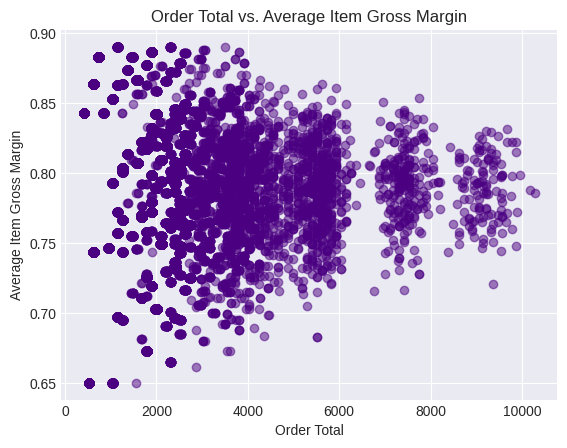

In [20]:
#plot for above data
plt.scatter(order_size_profitability['order_total'], order_size_profitability['profitability'], alpha=0.5, c='indigo')
plt.xlabel('Order Total')
plt.ylabel('Average Item Gross Margin')
plt.title('Order Total vs. Average Item Gross Margin')
plt.grid(True)
plt.show()

In [21]:
# Q5.4: Profitability by store
order_profitability_by_store = order_size_profitability.join(
    orders.select(['id', 'store_id']),
    left_on='id',
    right_on='id',
    how='left'
)

store_profitability = order_profitability_by_store.join(
    stores.select(['id', 'name']),
    left_on='store_id',
    right_on='id',
    how='left'
)

store_profitability = store_profitability.group_by('name').agg(
    pl.mean('profitability').alias('store_profitability')
)

print("Average Order Profitability by Store:", store_profitability.sort('store_profitability', descending=True))


Average Order Profitability by Store: shape: (2, 2)
┌──────────────┬─────────────────────┐
│ name         ┆ store_profitability │
│ ---          ┆ ---                 │
│ str          ┆ f64                 │
╞══════════════╪═════════════════════╡
│ Philadelphia ┆ 0.795052            │
│ Brooklyn     ┆ 0.794346            │
└──────────────┴─────────────────────┘


## Question 6: Business Optimization Recommendations

Based on your analysis, provide three specific, data-driven recommendations to improve business performance. Support each recommendation with relevant metrics and visualizations.

### Recommendation 1:
#Observation
Brooklyn store has higher revenue per day since opening date compared to the Philadelphia store

#Recommendation
Investigate the operational strategies, marketing efforts, or customer demographics of the Brooklyn store that might be contributing to its higher revenue per day.
Consider implementing similar successful strategies in the Philadelphia store to potentially boost its revenue performance.

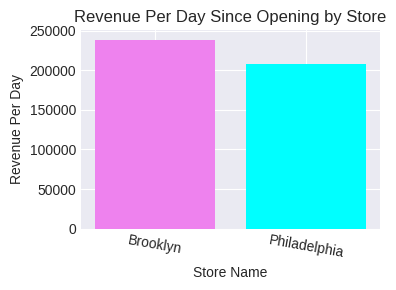

Estimated number of days to reach the target total revenue (49,648,658): 208.06 days

Current Philadelphia daily revenue: 207,708.92
Target Philadelphia daily revenue: 238,628.59



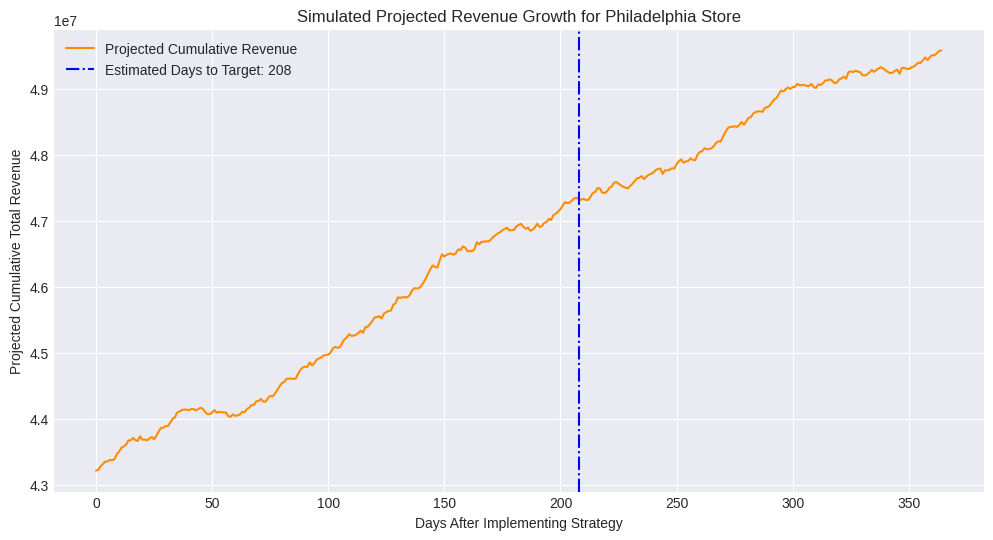

In [22]:
# Supporting analysis for Recommendation 1
store_names = revenue_per_day_by_store['name'].to_list()
revenue_per_day = revenue_per_day_by_store['revenue_per_day'].to_list()

plt.figure(figsize=(4, 3))
plt.bar(store_names, revenue_per_day, color=['violet', 'cyan'])
plt.xlabel('Store Name')
plt.ylabel('Revenue Per Day')
plt.title('Revenue Per Day Since Opening by Store')
plt.xticks(rotation=-10, ha='center')
plt.tight_layout()
plt.show()


#####
num_simulation_days = 365

philadelphia_data = store_revenue_and_days.filter(pl.col('name') == 'Philadelphia')
philly_totalRevenue_current = philadelphia_data['total_revenue'].item()
philadelphia_average_days_open = philadelphia_data['average_days_open'].item()

# Assume target daily revenue for Philadelphia store is to match Brooklyn's current daily revenue numbers
philly_dailyRevenue_current = revenue_per_day_by_store.filter(pl.col('name') == 'Philadelphia')['revenue_per_day'].item()
philly_dailyRevenue_target = revenue_per_day_by_store.filter(pl.col('name') == 'Brooklyn')['revenue_per_day'].item()


# finding the average daily revenue increase target
average_daily_increase_target = philly_dailyRevenue_target - philly_dailyRevenue_current

base_daily_growth = average_daily_increase_target * 0.6 # On average, 60% of the target daily increase is expected as a consistent positive growth.
# Random fluctuation that can cause ups, downs, or no increase
simulated_daily_changes = base_daily_growth + np.random.normal(loc=0, scale=average_daily_increase_target, size=num_simulation_days)

# If a simulated daily change is too low(more than 50% drop of current daily avg), this will normalize it to prevent too high fluctuations
simulated_daily_changes[simulated_daily_changes < -philly_dailyRevenue_current * 0.5] = -philly_dailyRevenue_current * 0.5


# This is the target total revenue based on achieving Brooklyn's daily rate over Philadelphia's open period
philly_revenue_target = philly_dailyRevenue_target * philadelphia_average_days_open
total_revenue_increase = philly_revenue_target - philly_totalRevenue_current


# Estimate the number of days to reach this total increase assuming linear growth
if average_daily_increase_target > 0:
    estimated_days_to_target = total_revenue_increase / average_daily_increase_target
else:
    estimated_days_to_target = 365 #

# Print the estimated number of days
print(f"Estimated number of days to reach the target total revenue ({philly_revenue_target:,.0f}): {estimated_days_to_target:.2f} days\n")
print(f"Current Philadelphia daily revenue: {philly_dailyRevenue_current:,.2f}")
print(f"Target Philadelphia daily revenue: {philly_dailyRevenue_target:,.2f}\n")

projected_revenue = np.cumsum(simulated_daily_changes) + philly_totalRevenue_current
projected_revenue[projected_revenue < philly_totalRevenue_current * 0.9] = philly_totalRevenue_current * 0.9


plt.figure(figsize=(12, 6))
plt.plot(np.arange(num_simulation_days), projected_revenue, linestyle='solid', color='darkorange', label='Projected Cumulative Revenue')

if estimated_days_to_target < num_simulation_days:
    plt.axvline(x=estimated_days_to_target, color='blue', linestyle='-.', label=f'Estimated Days to Target: {estimated_days_to_target:.0f}')



plt.xlabel('Days After Implementing Strategy')
plt.ylabel('Projected Cumulative Total Revenue')
plt.title('Simulated Projected Revenue Growth for Philadelphia Store')
plt.grid(True)
plt.legend()
plt.show()

### Recommendation 2:
#Observation
Beverages contribute significantly more to total revenue than jaffles, despite having a lower average product price.

#Recommendation
Analyze the sales volume and popularity of individual beverage products. Explore potential reasons for the higher revenue contribution of beverages, such as marketing, seasonality, or customer preferences.
Consider strategies to increase the sales volume of jaffles or introduce new high-margin jaffle products to balance revenue contribution across categories.

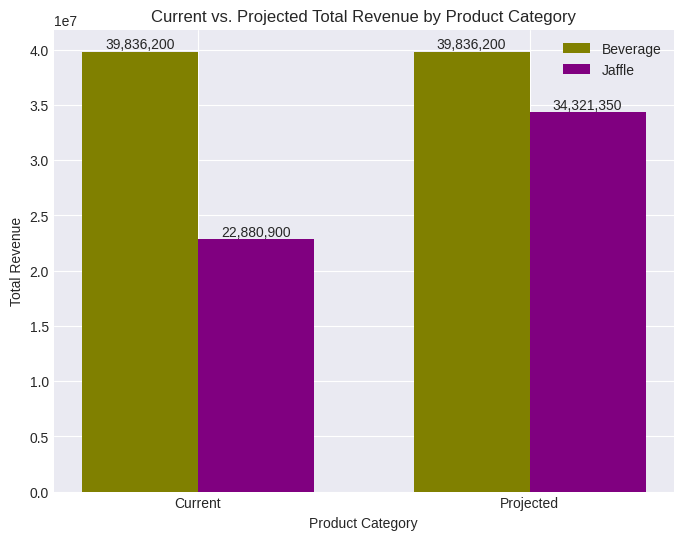

In [23]:
# Supporting analysis for Recommendation 2
categories = revenue_by_category['category'].to_list()
total_revenues = revenue_by_category['total_revenue'].to_list()

jaffle_revenue = revenue_by_category.filter(pl.col('category') == 'jaffle')['total_revenue'].item()
beverage_revenue = revenue_by_category.filter(pl.col('category') == 'beverage')['total_revenue'].item()

# assume a 50% increase in jaffle revenue
increased_jaffle_revenue = jaffle_revenue * 1.5

all_current_revenues = [beverage_revenue, jaffle_revenue]
all_projected_revenues = [beverage_revenue, increased_jaffle_revenue]


category_labels = ['Beverage', 'Jaffle']
group_labels = ['Current', 'Projected']
x = np.arange(len(group_labels))
width = 0.35

plt.figure(figsize=(8, 6))
bev_bars = plt.bar(x - width/2, [all_current_revenues[0], all_projected_revenues[0]], width, label='Beverage', color='olive')

jaf_bars = plt.bar(x + width/2, [all_current_revenues[1], all_projected_revenues[1]], width, label='Jaffle', color='purple')

plt.xlabel('Product Category')
plt.title('Current vs. Projected Total Revenue by Product Category')
plt.xticks(x, group_labels)
plt.ylabel('Total Revenue')
plt.legend()


plt.bar_label(bev_bars, fmt='{:,.0f}')
plt.bar_label(jaf_bars, fmt='{:,.0f}')
plt.show()


### Recommendation 3:
#Observation
A significant number of customers are repeat customers, and a small group of customers contribute a large portion of the total revenue.

#Recommendation 3
Develop and implement customer retention strategies to encourage repeat business, such as loyalty programs, exclusive offers, or personalized communication.
Focus on understanding the needs and preferences of the top revenue-contributing customers and consider tailored strategies to further engage and reward them.

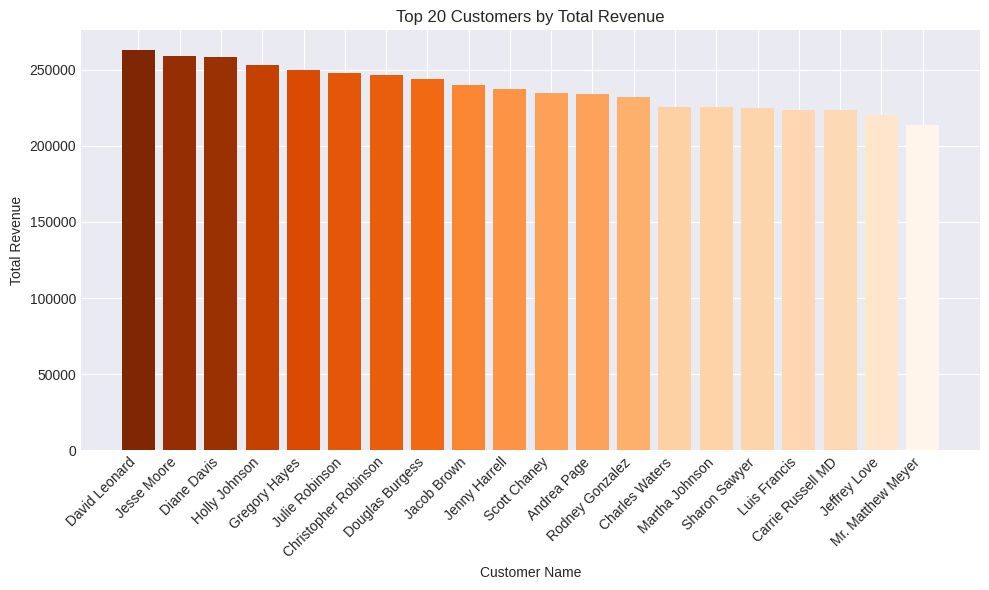

In [24]:
# Supporting analysis for Recommendation 3
import matplotlib.cm as cm


top_10_customers = top_revenue_customers.sort('total_customer_revenue', descending=True).head(20)

customer_names = top_10_customers['name'].to_list()
total_revenues = top_10_customers['total_customer_revenue'].to_list()

min_revenue = top_10_customers['total_customer_revenue'].min()
max_revenue = top_10_customers['total_customer_revenue'].max()

cmap = plt.get_cmap('Oranges')
normalize = plt.Normalize(min_revenue, max_revenue)
colors = [cmap(normalize(revenue)) for revenue in total_revenues]


# Create a bar plot of top 20 customers by revenue with names on the x-axis and varying colors
plt.figure(figsize=(10, 6))
plt.bar(customer_names, total_revenues, color=colors)
plt.xlabel('Customer Name')
plt.ylabel('Total Revenue')
plt.title('Top 20 Customers by Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


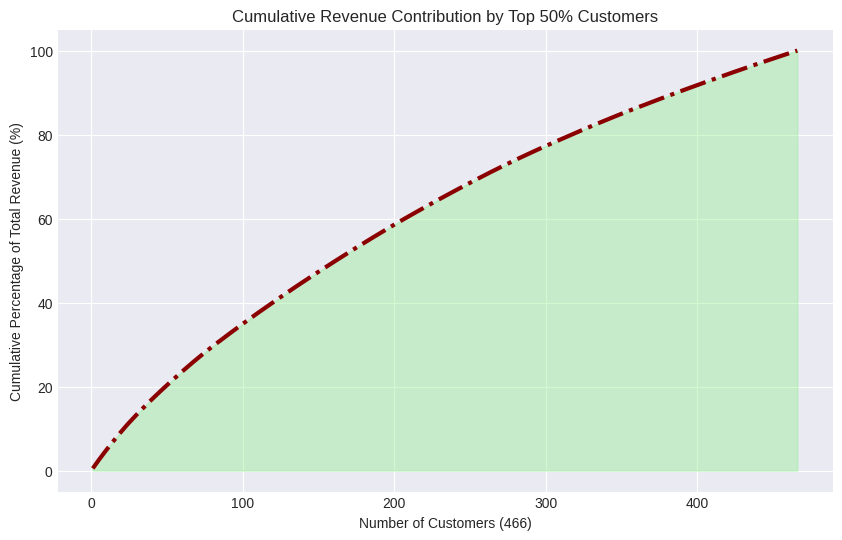

In [25]:
sorted_customers = top_revenue_customers.sort('total_customer_revenue', descending=True)

# Calculate the number of customers for the top 50%
top_50_percent_count = int(len(sorted_customers) * 0.5)

# Filter for the top 50% of customers
top_50_percent_customers = sorted_customers.head(top_50_percent_count)

total_revenue = top_50_percent_customers['total_customer_revenue'].sum()

# cumulative revenue for the top 50%
revenue_np = top_50_percent_customers['total_customer_revenue'].to_numpy()
cumulative_revenue_top50 = np.cumsum(revenue_np)

# Add cumulative revenue and percentage to the filtered DataFrame
cumulative_rev = top_50_percent_customers.with_columns(
    pl.Series(name='cumulative_revenue', values=cumulative_revenue_top50)
).with_columns(
    (pl.col('cumulative_revenue') / total_revenue * 100).alias('cumulative_revenue_percentage')
)

customer_count = np.arange(1, len(cumulative_rev) + 1)
plot_cumulative_rev = cumulative_rev['cumulative_revenue_percentage'].to_list()

plt.figure(figsize=(10, 6))
plt.fill_between(customer_count, plot_cumulative_rev, color='lightgreen', alpha=0.4)
plt.plot(customer_count, plot_cumulative_rev, linestyle='-.', color='darkred', linewidth=3)

plt.xlabel(f'Number of Customers ({top_50_percent_count})')
plt.ylabel('Cumulative Percentage of Total Revenue (%)')
plt.title(f'Cumulative Revenue Contribution by Top 50% Customers')
plt.grid(True)
plt.show()

## Executive Summary

The following report outlines a series of data-backed strategic recommendations using data inference techniques from the Python Polars package. This report makes a number of key findings including a need to apply Jaffle's Brooklyn store's success to the Philadelphia store, increasing margins on food products and implementing customer retention programs.

### Key Findings:
1. It can be observed that the Brooklyn store has higher revenue per day since opening compared to the Philadelphia store.
2. Jaffle's beverages contribute significantly more to total revenue than Jaffle's food, despite the lower average product price.
3. While a significant number of customers are repeat customers, only a small group contributes a large portion of the total revenue.

Team Blue One consultants recommend a couple of different strategies to increase market share.

### Strategic Recommendations:
1. Investigate the operational strategies, marketing efforts, or customer demographics of the Brooklyn store that might be contributing to its higher revenue per day, and consider implementing these approaches in the Philadelphia store.
2. Jaffle should seek to understand what's driving it in terms of sales volume and the popularity of individual beverage products. Possible reasons may include varied marketing, seasonality, or customer preferences. Once understood, Jaffle should aim to apply these insights to its food products and/or introduce new high-margin Jaffle products to balance revenue contribution across its two product categories.
3. Consider developing customer retention strategies to encourage repeat business, for example, loyalty programs, exclusive offers, or personalized communications. By understanding the needs and preferences of its top revenue-contributing customers, Jaffle can apply these insights across its wider customer base.


Detailed Executive summary - https://docs.google.com/document/d/1h7z_FEk26MKngSN97fOK-xp3shtQk2kHSKLFckOSJIE/edit?usp=sharing